In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
train_data

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [3]:
train_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [4]:
train_data.describe(include=object)

workclass education        maritalstatus       occupation relationship  \
count      30161     30161                30161            30161        30161   
unique         7        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22285      9840                14065             4038        12463   

          race    sex          native  Salary  
count    30161  30161           30161   30161  
unique       5      2              40       2  
top      White   Male   United-States   <=50K  
freq     25932  20380           27504   22653

Text(0, 0.5, 'Hours Per Week')

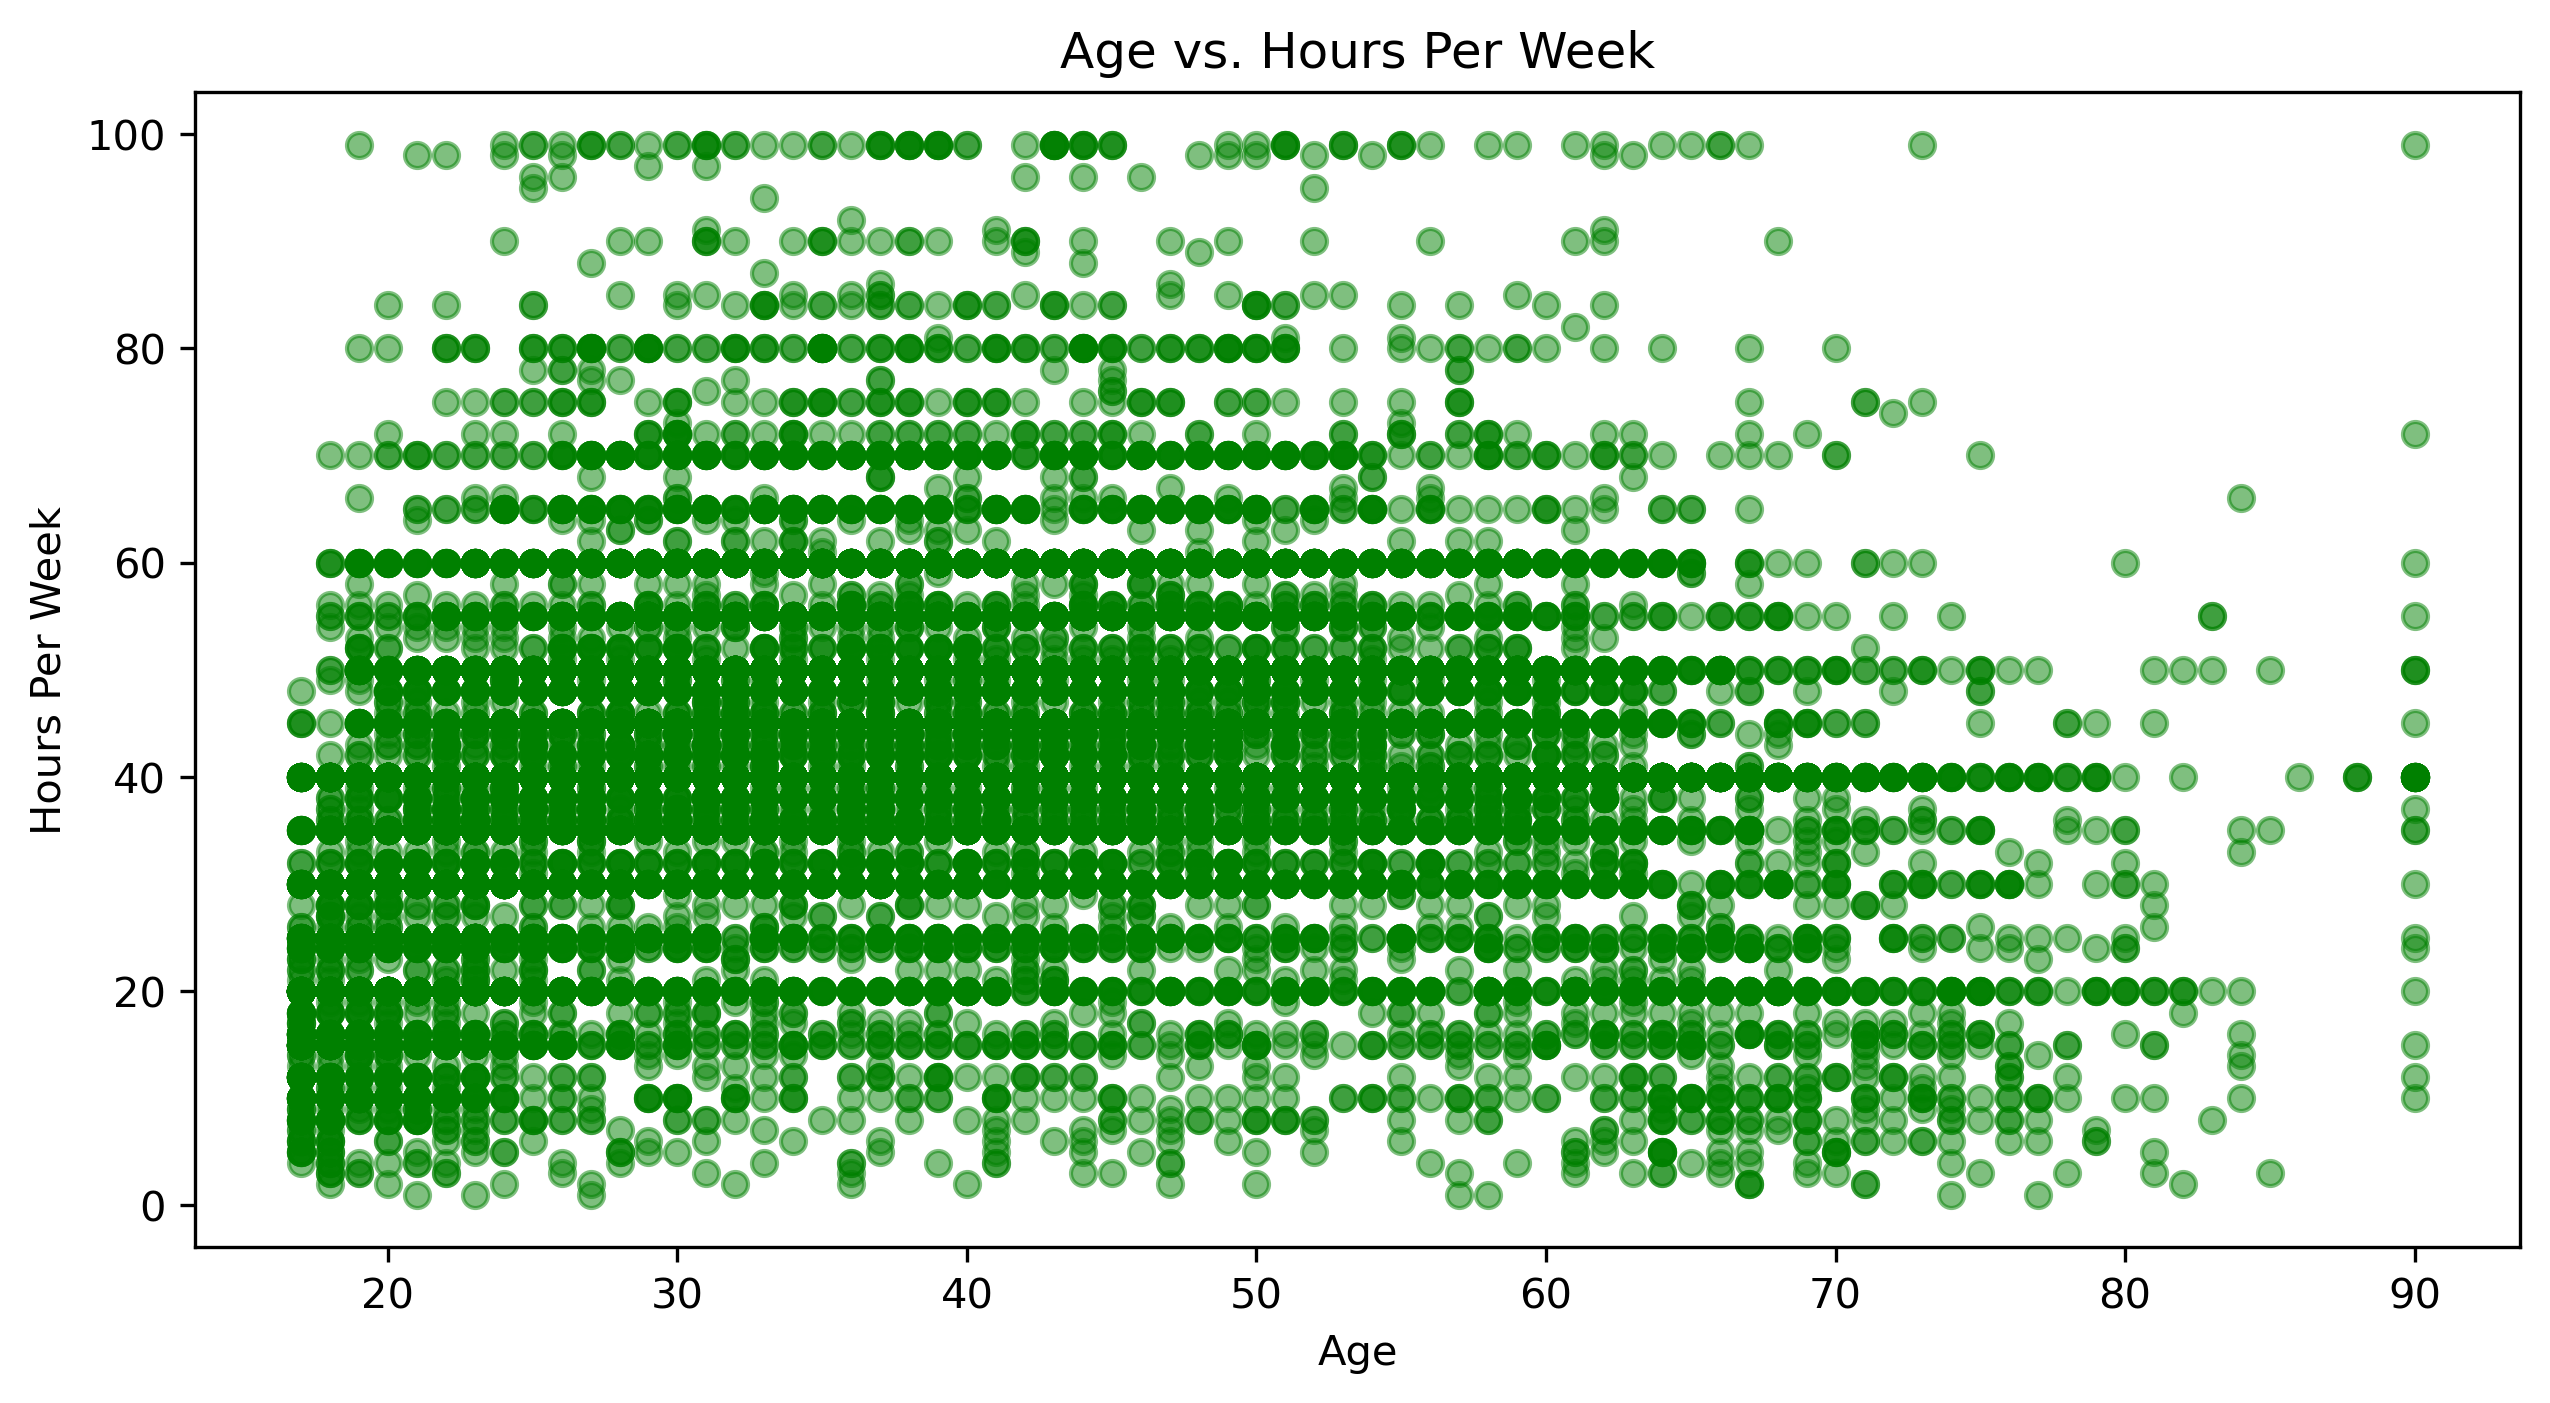

In [5]:
plt.scatter(train_data['age'], train_data['hoursperweek'], alpha=0.5, color='green')
plt.title('Age vs. Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')

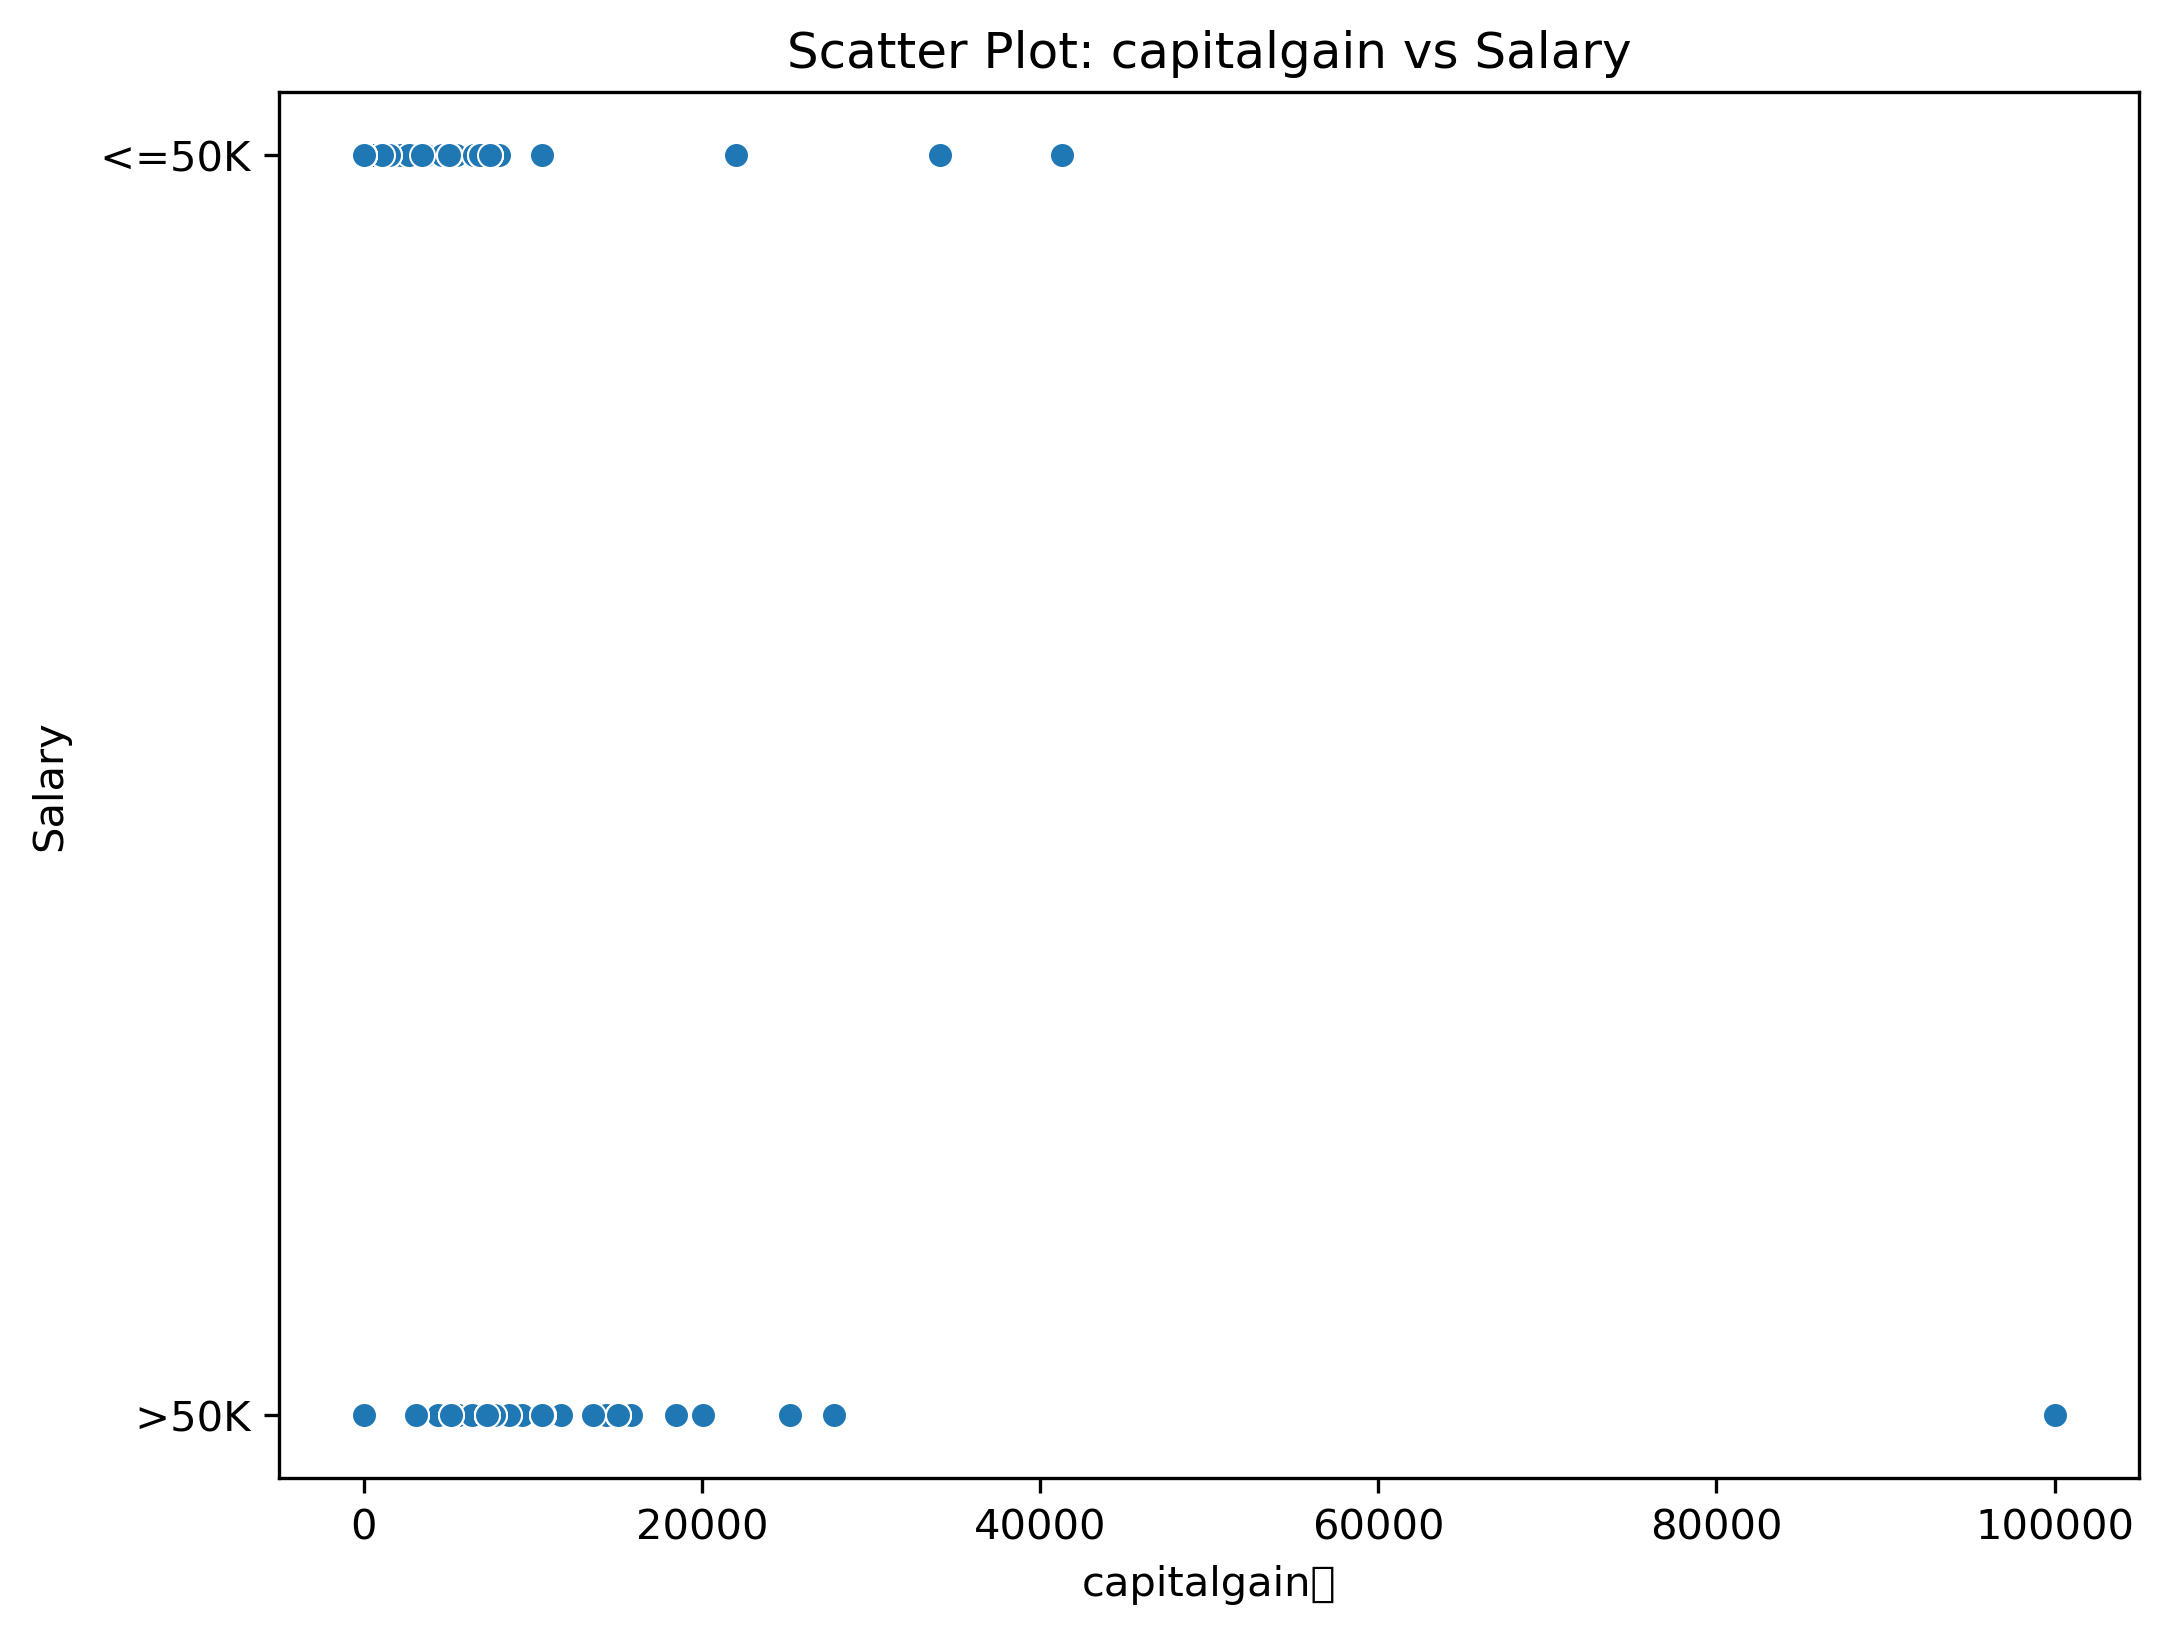

In [7]:
plt.scatter(train_data['age'], train_data['hoursperweek'], alpha=0.5, color='green')
plt.title('Age vs. Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')

Text(0, 0.5, 'Frequency')

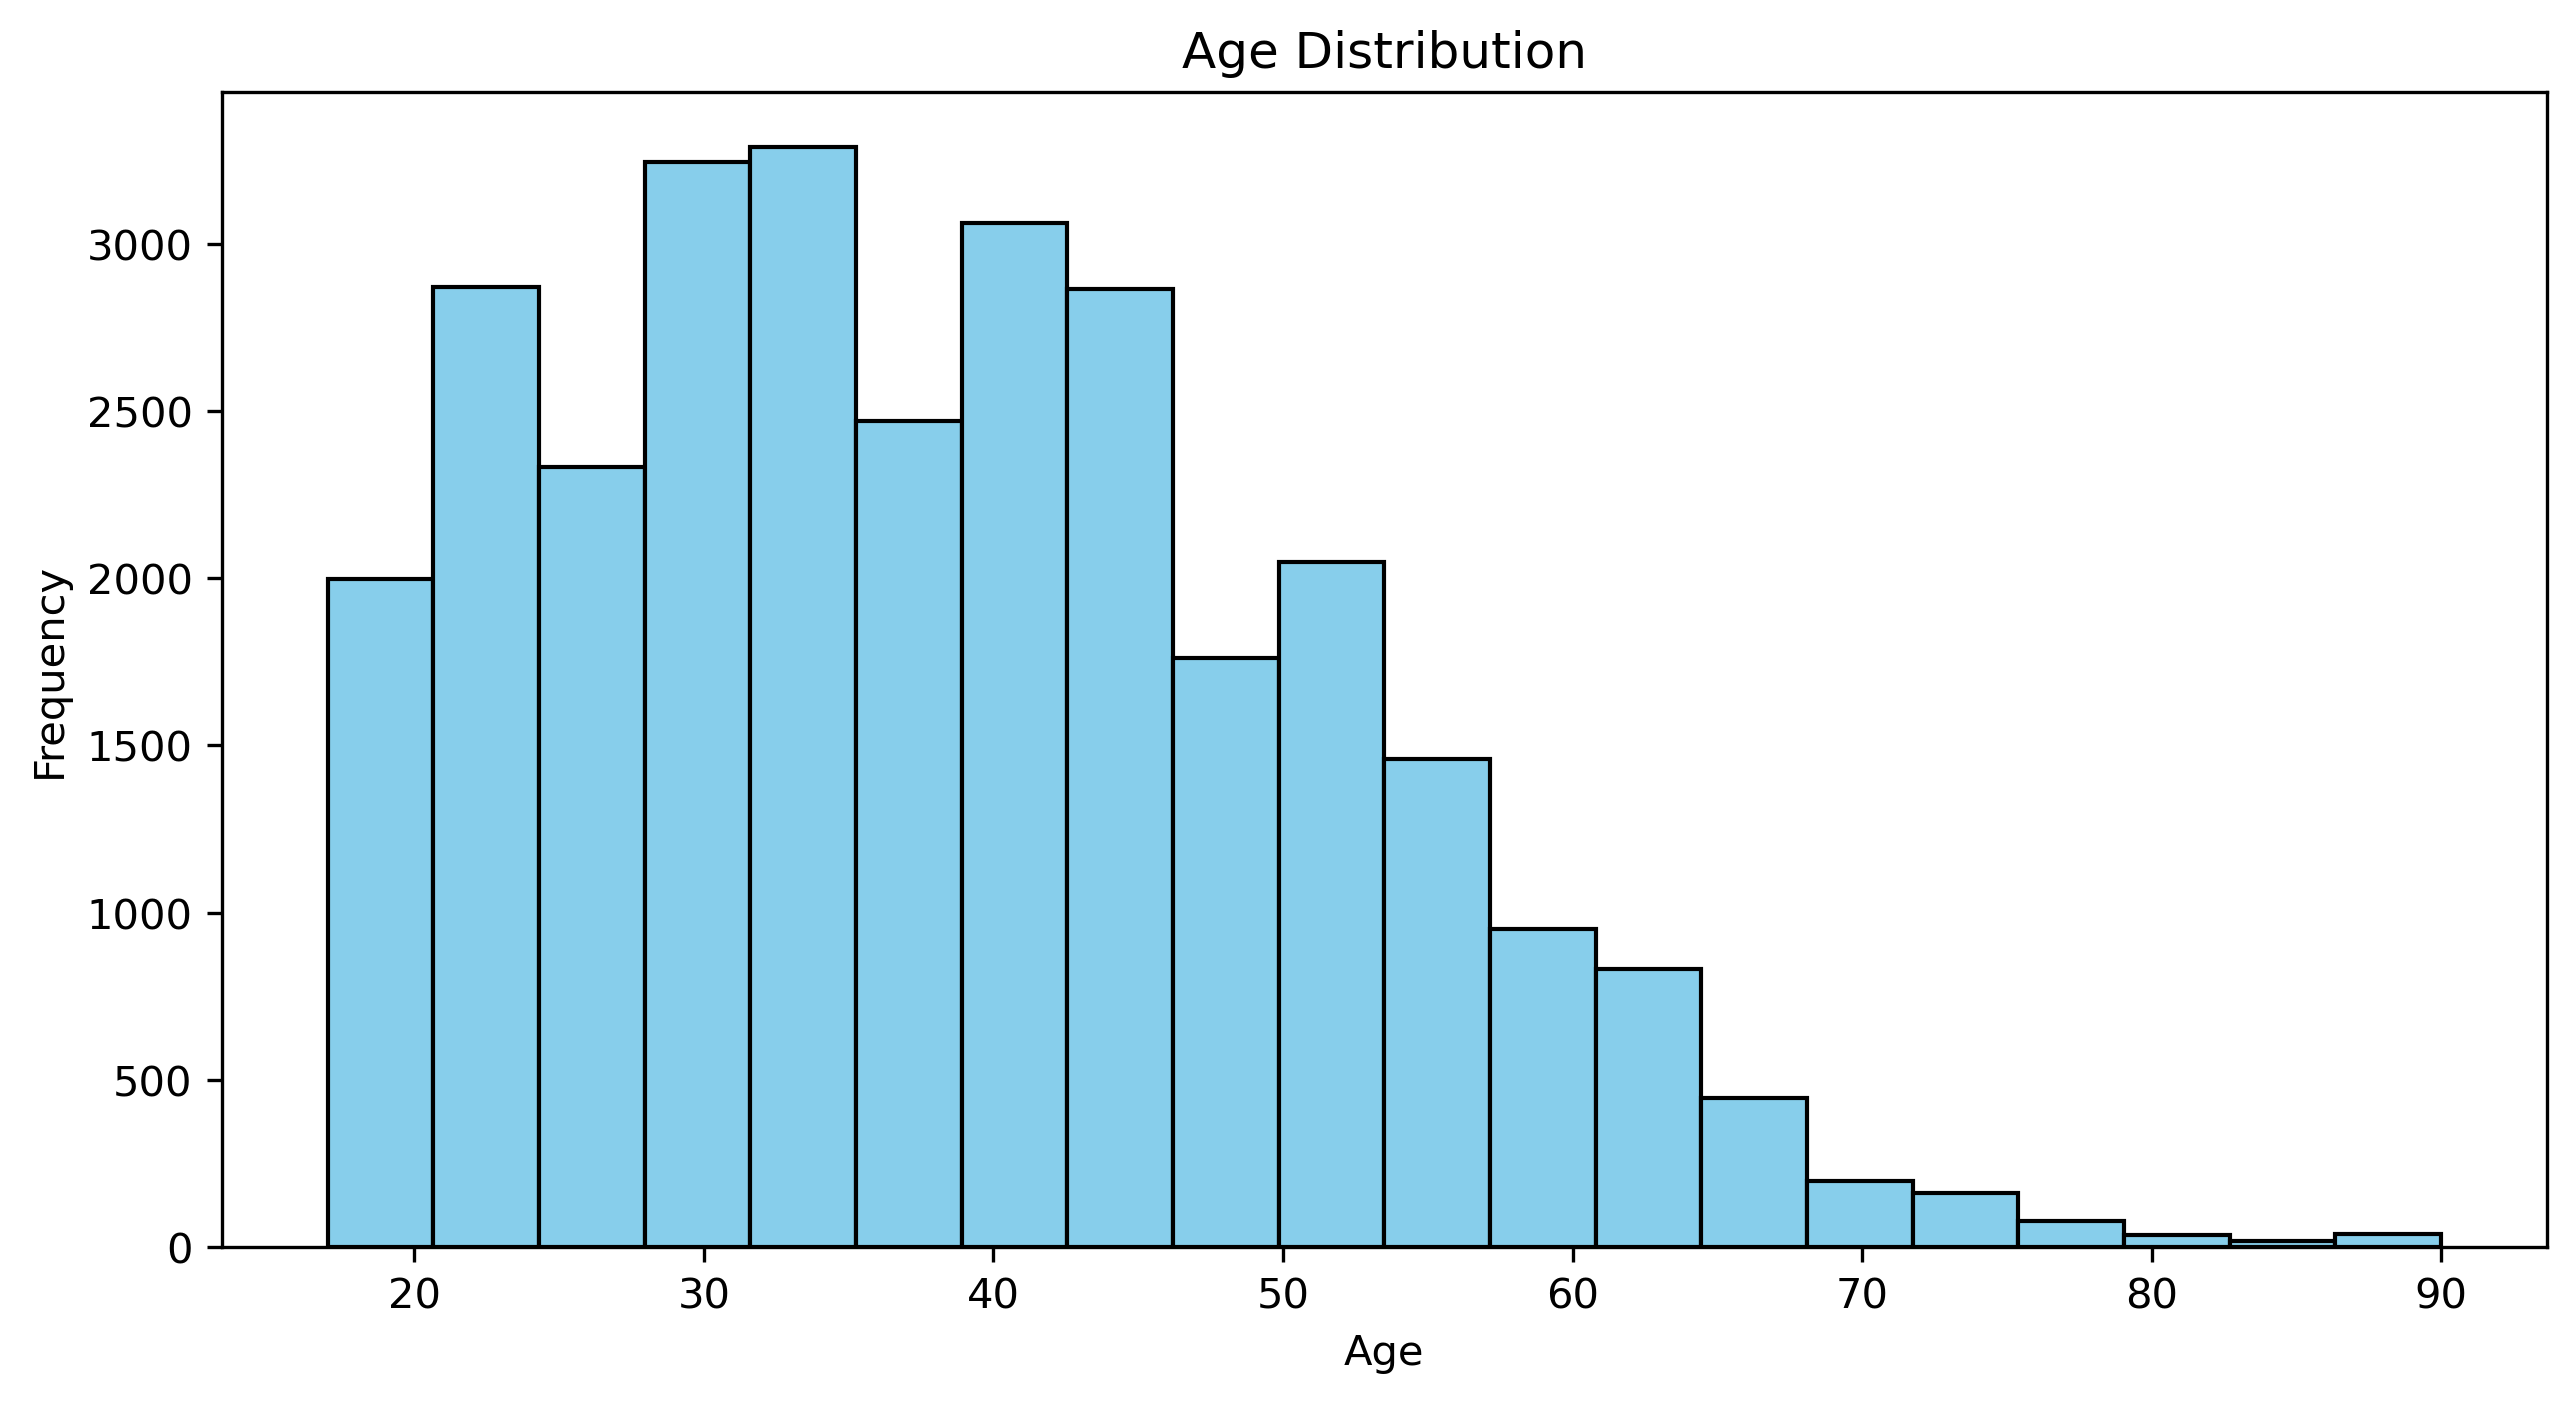

In [6]:
plt.hist(train_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

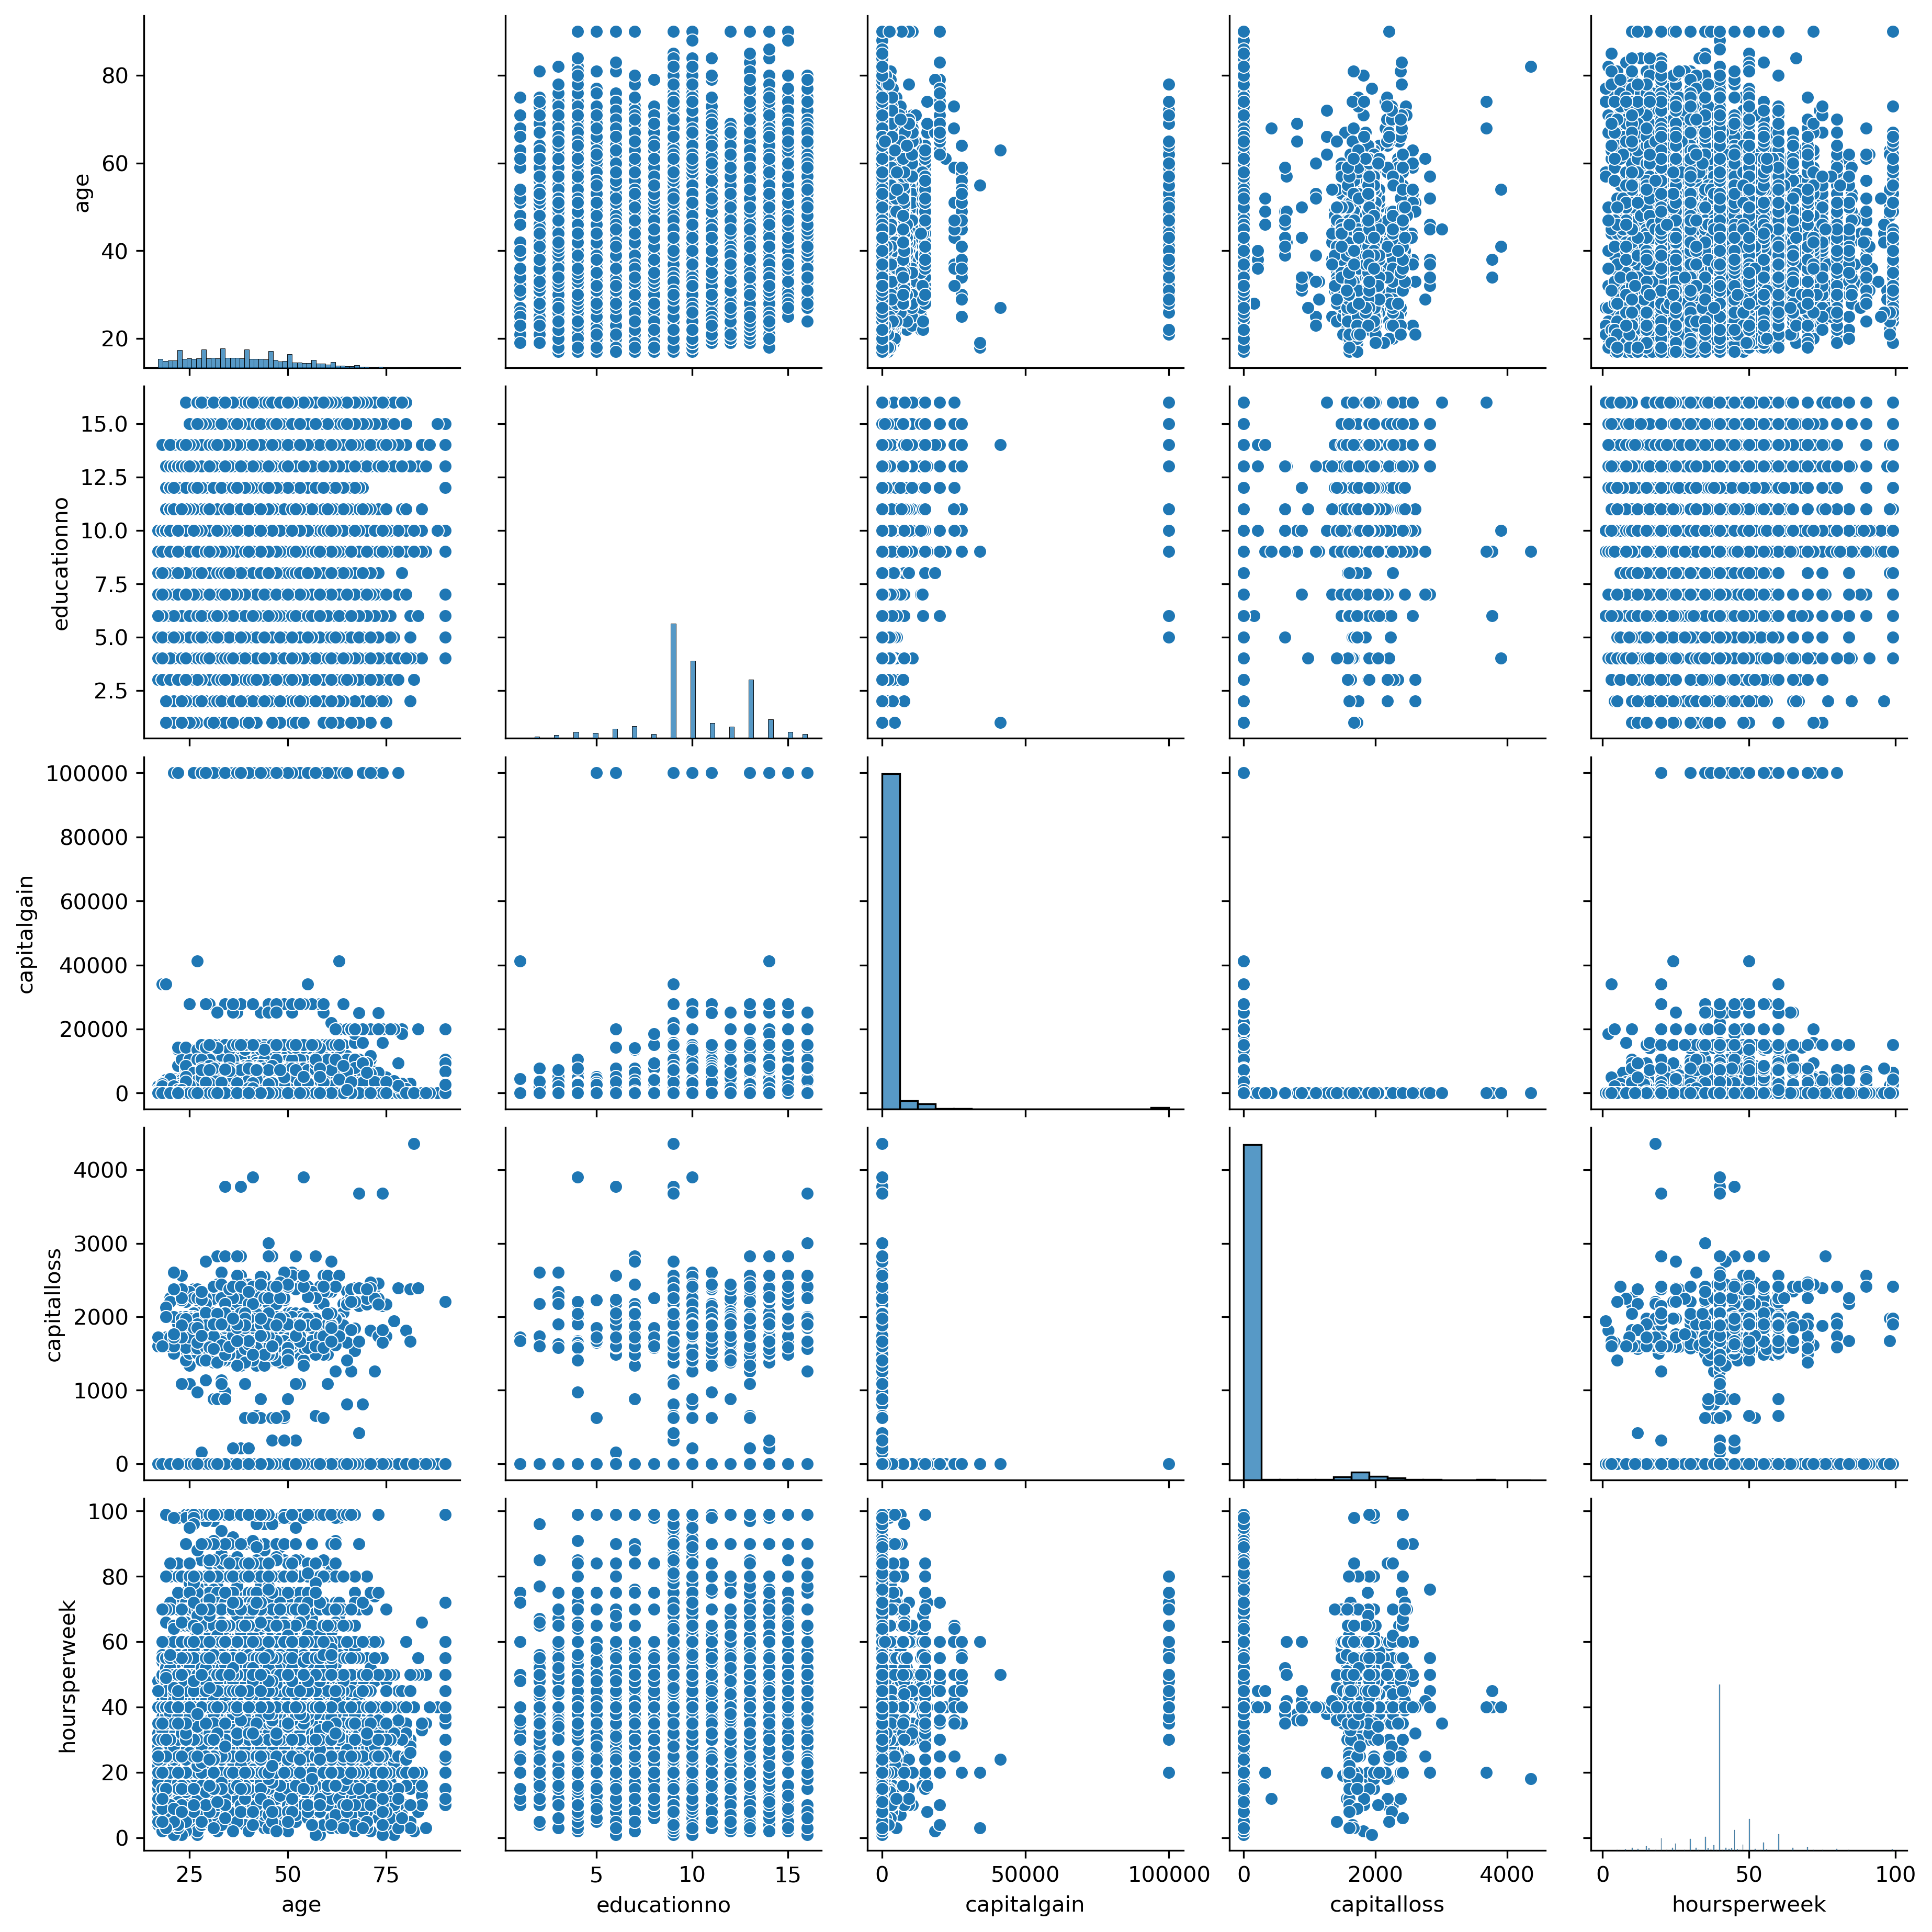

In [8]:
sns.pairplot(train_data)

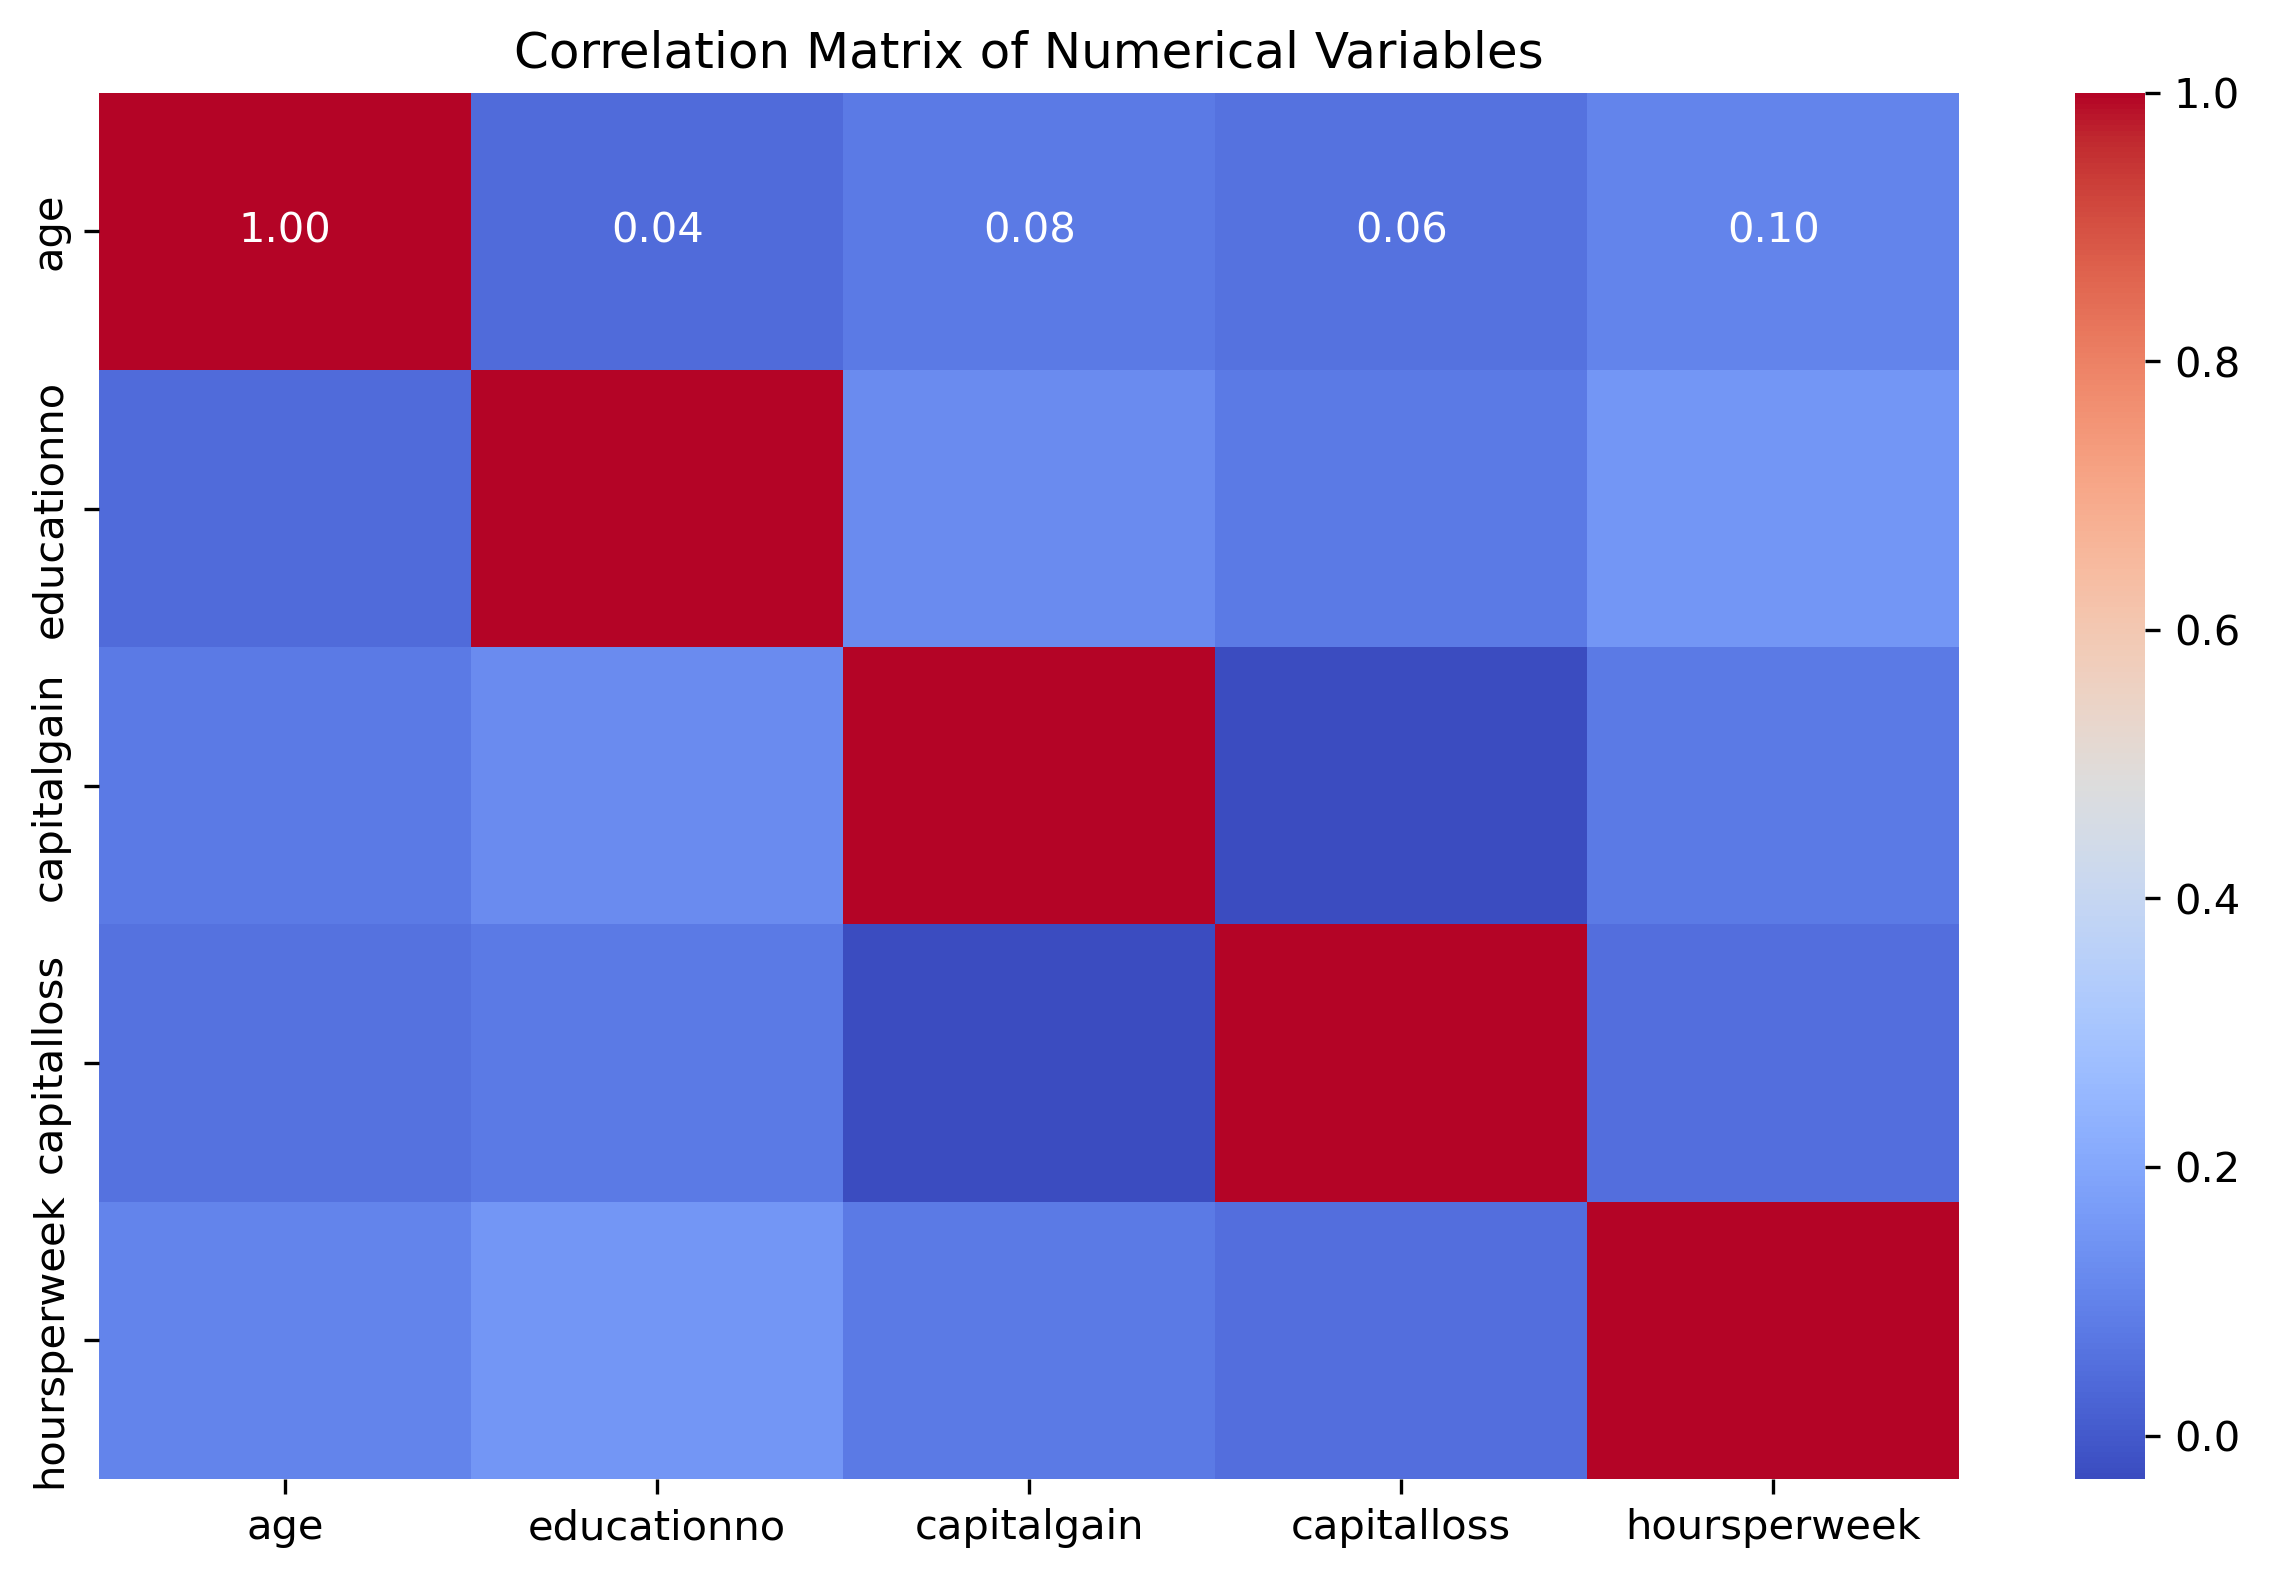

In [8]:
numerical_features = train_data.select_dtypes(int).columns
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

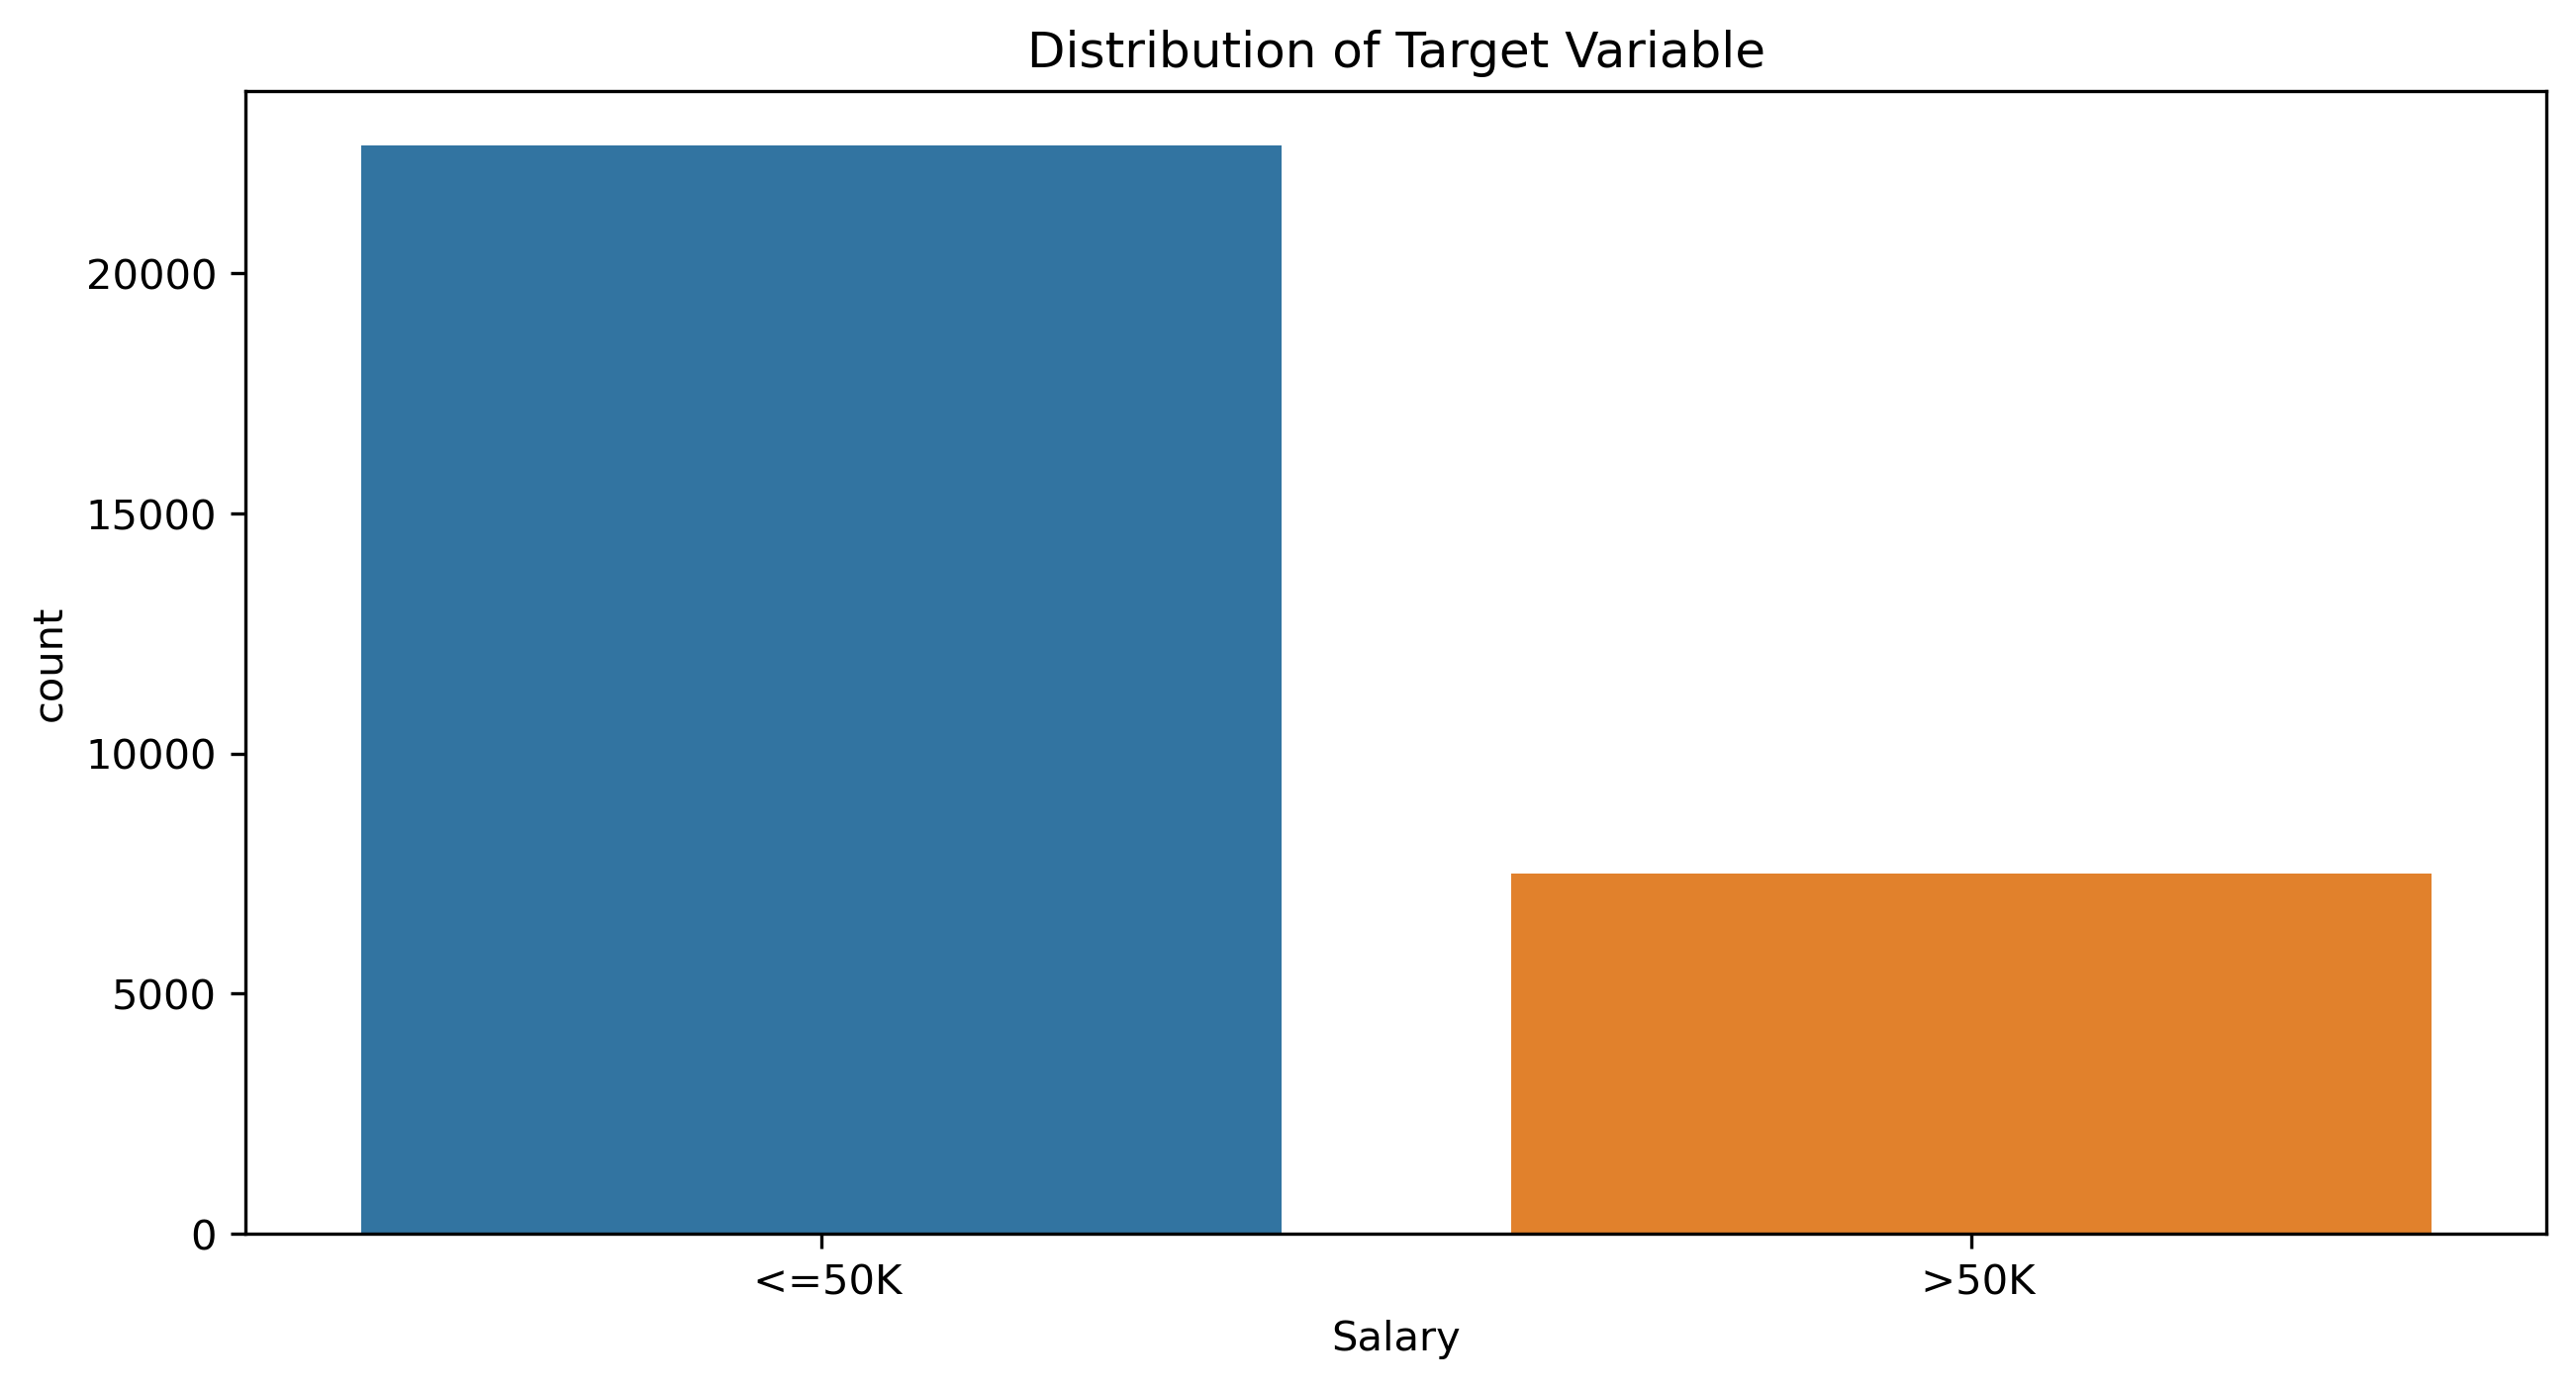

In [9]:
sns.countplot(x='Salary', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()


<Axes: >

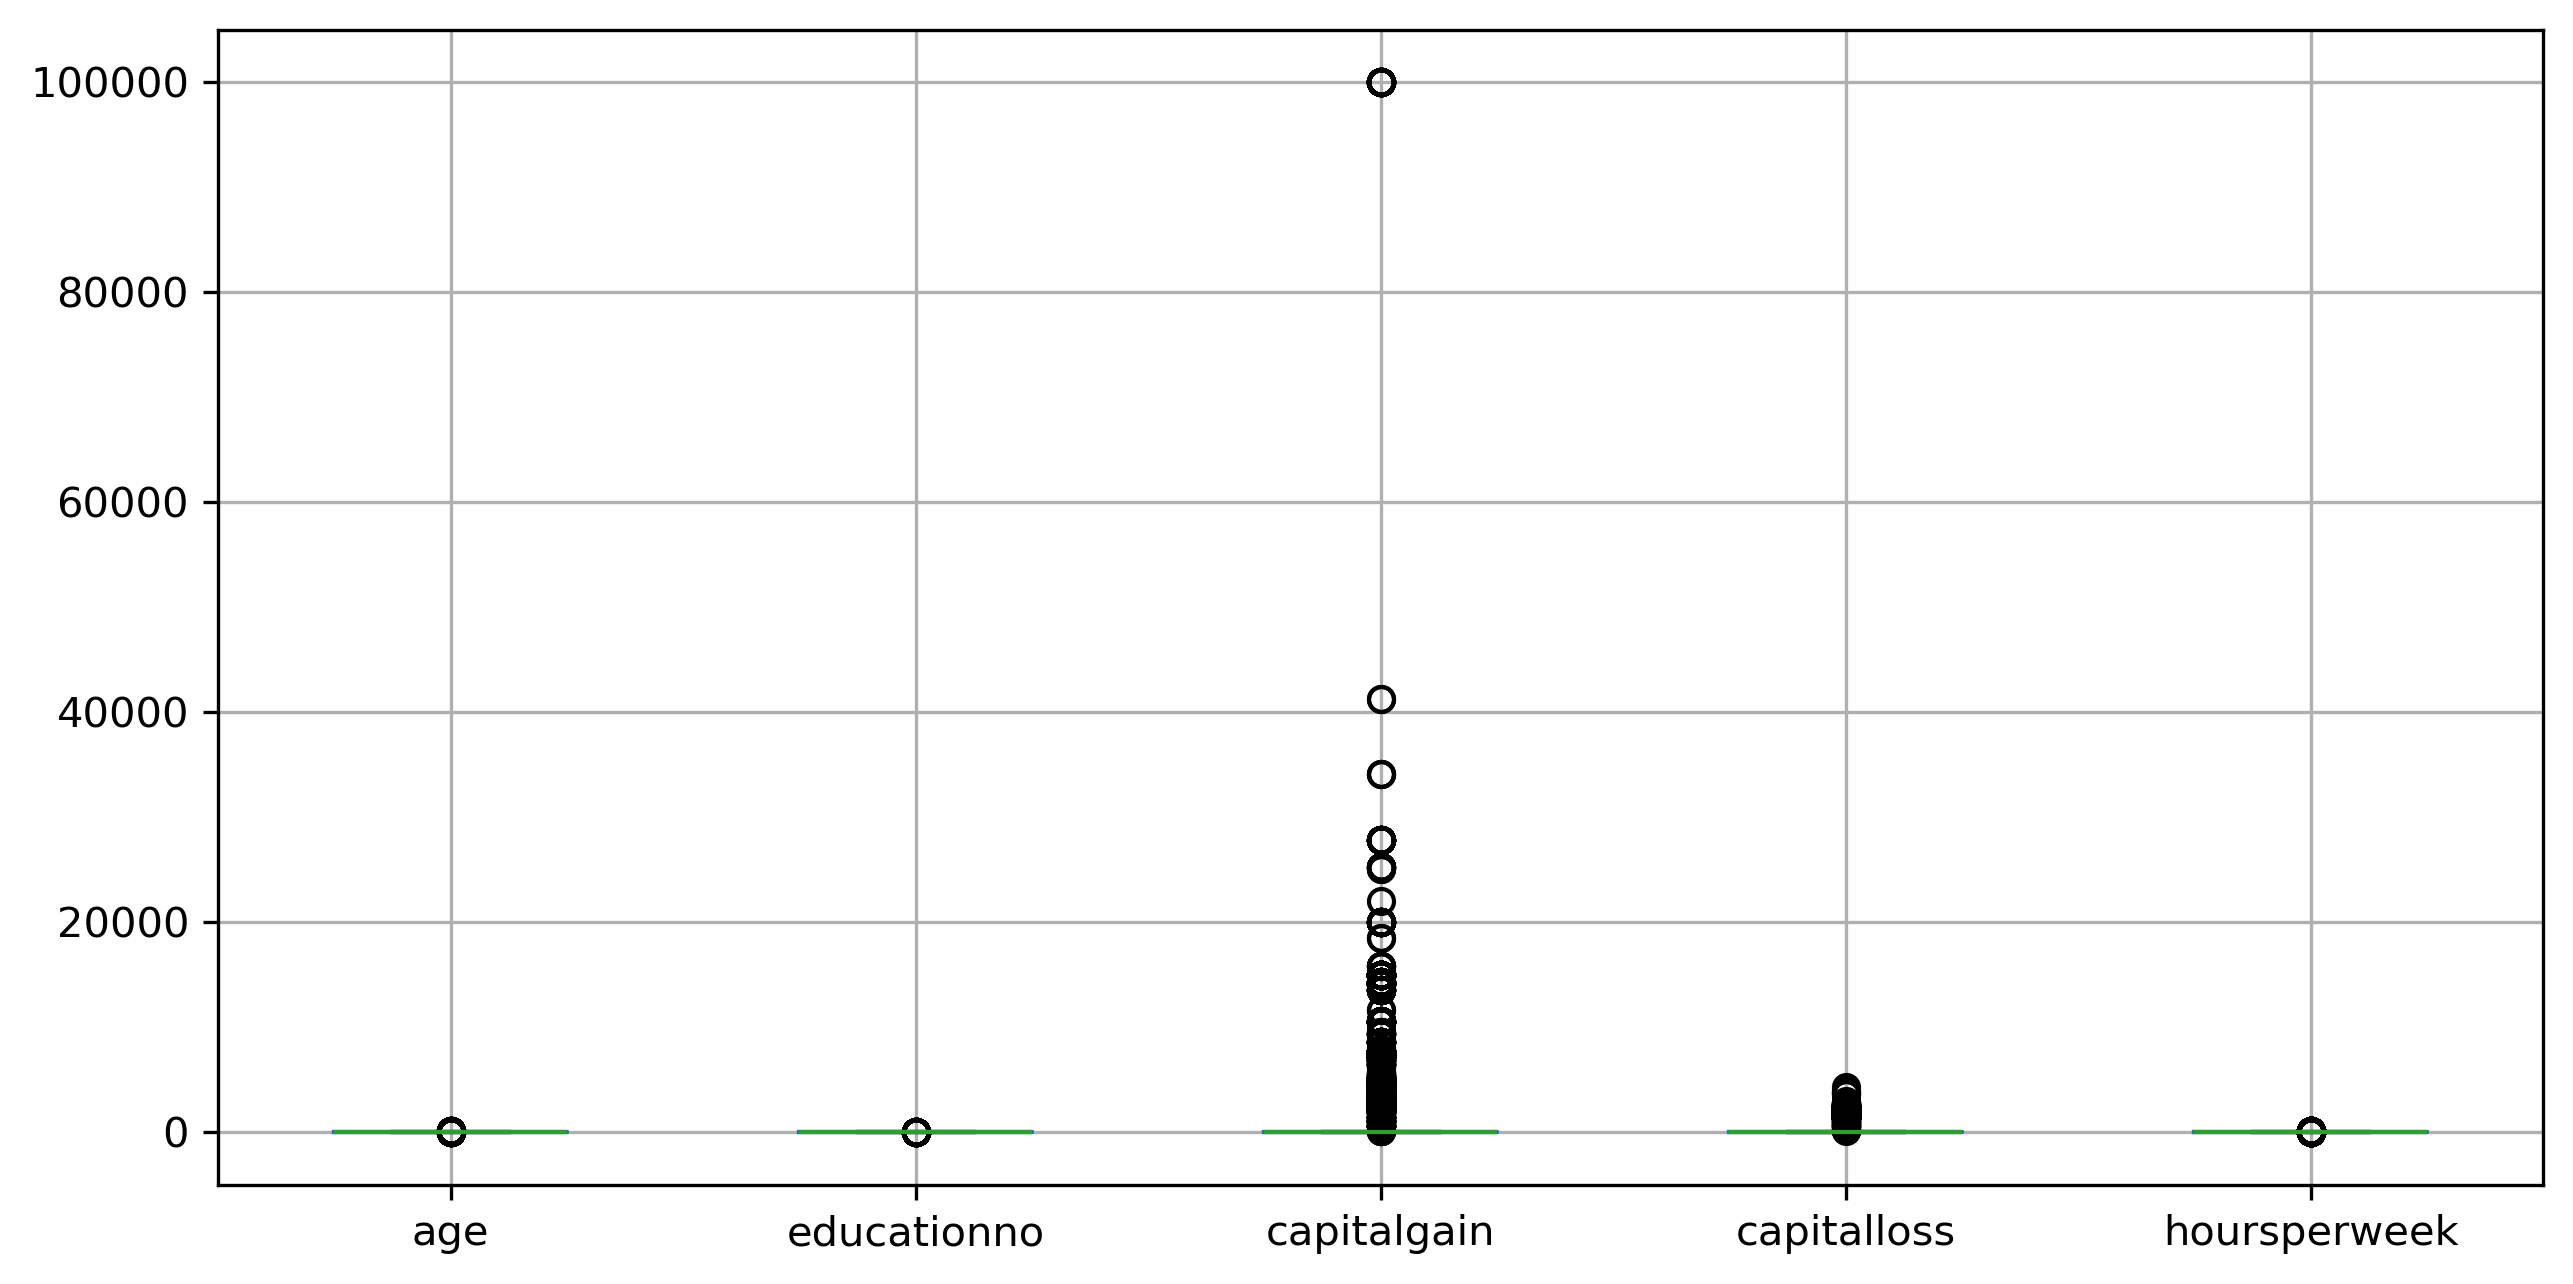

In [10]:
train_data.boxplot()

In [11]:
def outlier_replace(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

In [12]:
df = outlier_replace(train_data, 'age')
df = outlier_replace(train_data, 'educationno')
df = outlier_replace(train_data, 'capitalgain')
df = outlier_replace(train_data, 'capitalloss')
df = outlier_replace(train_data, 'hoursperweek')

<Axes: >

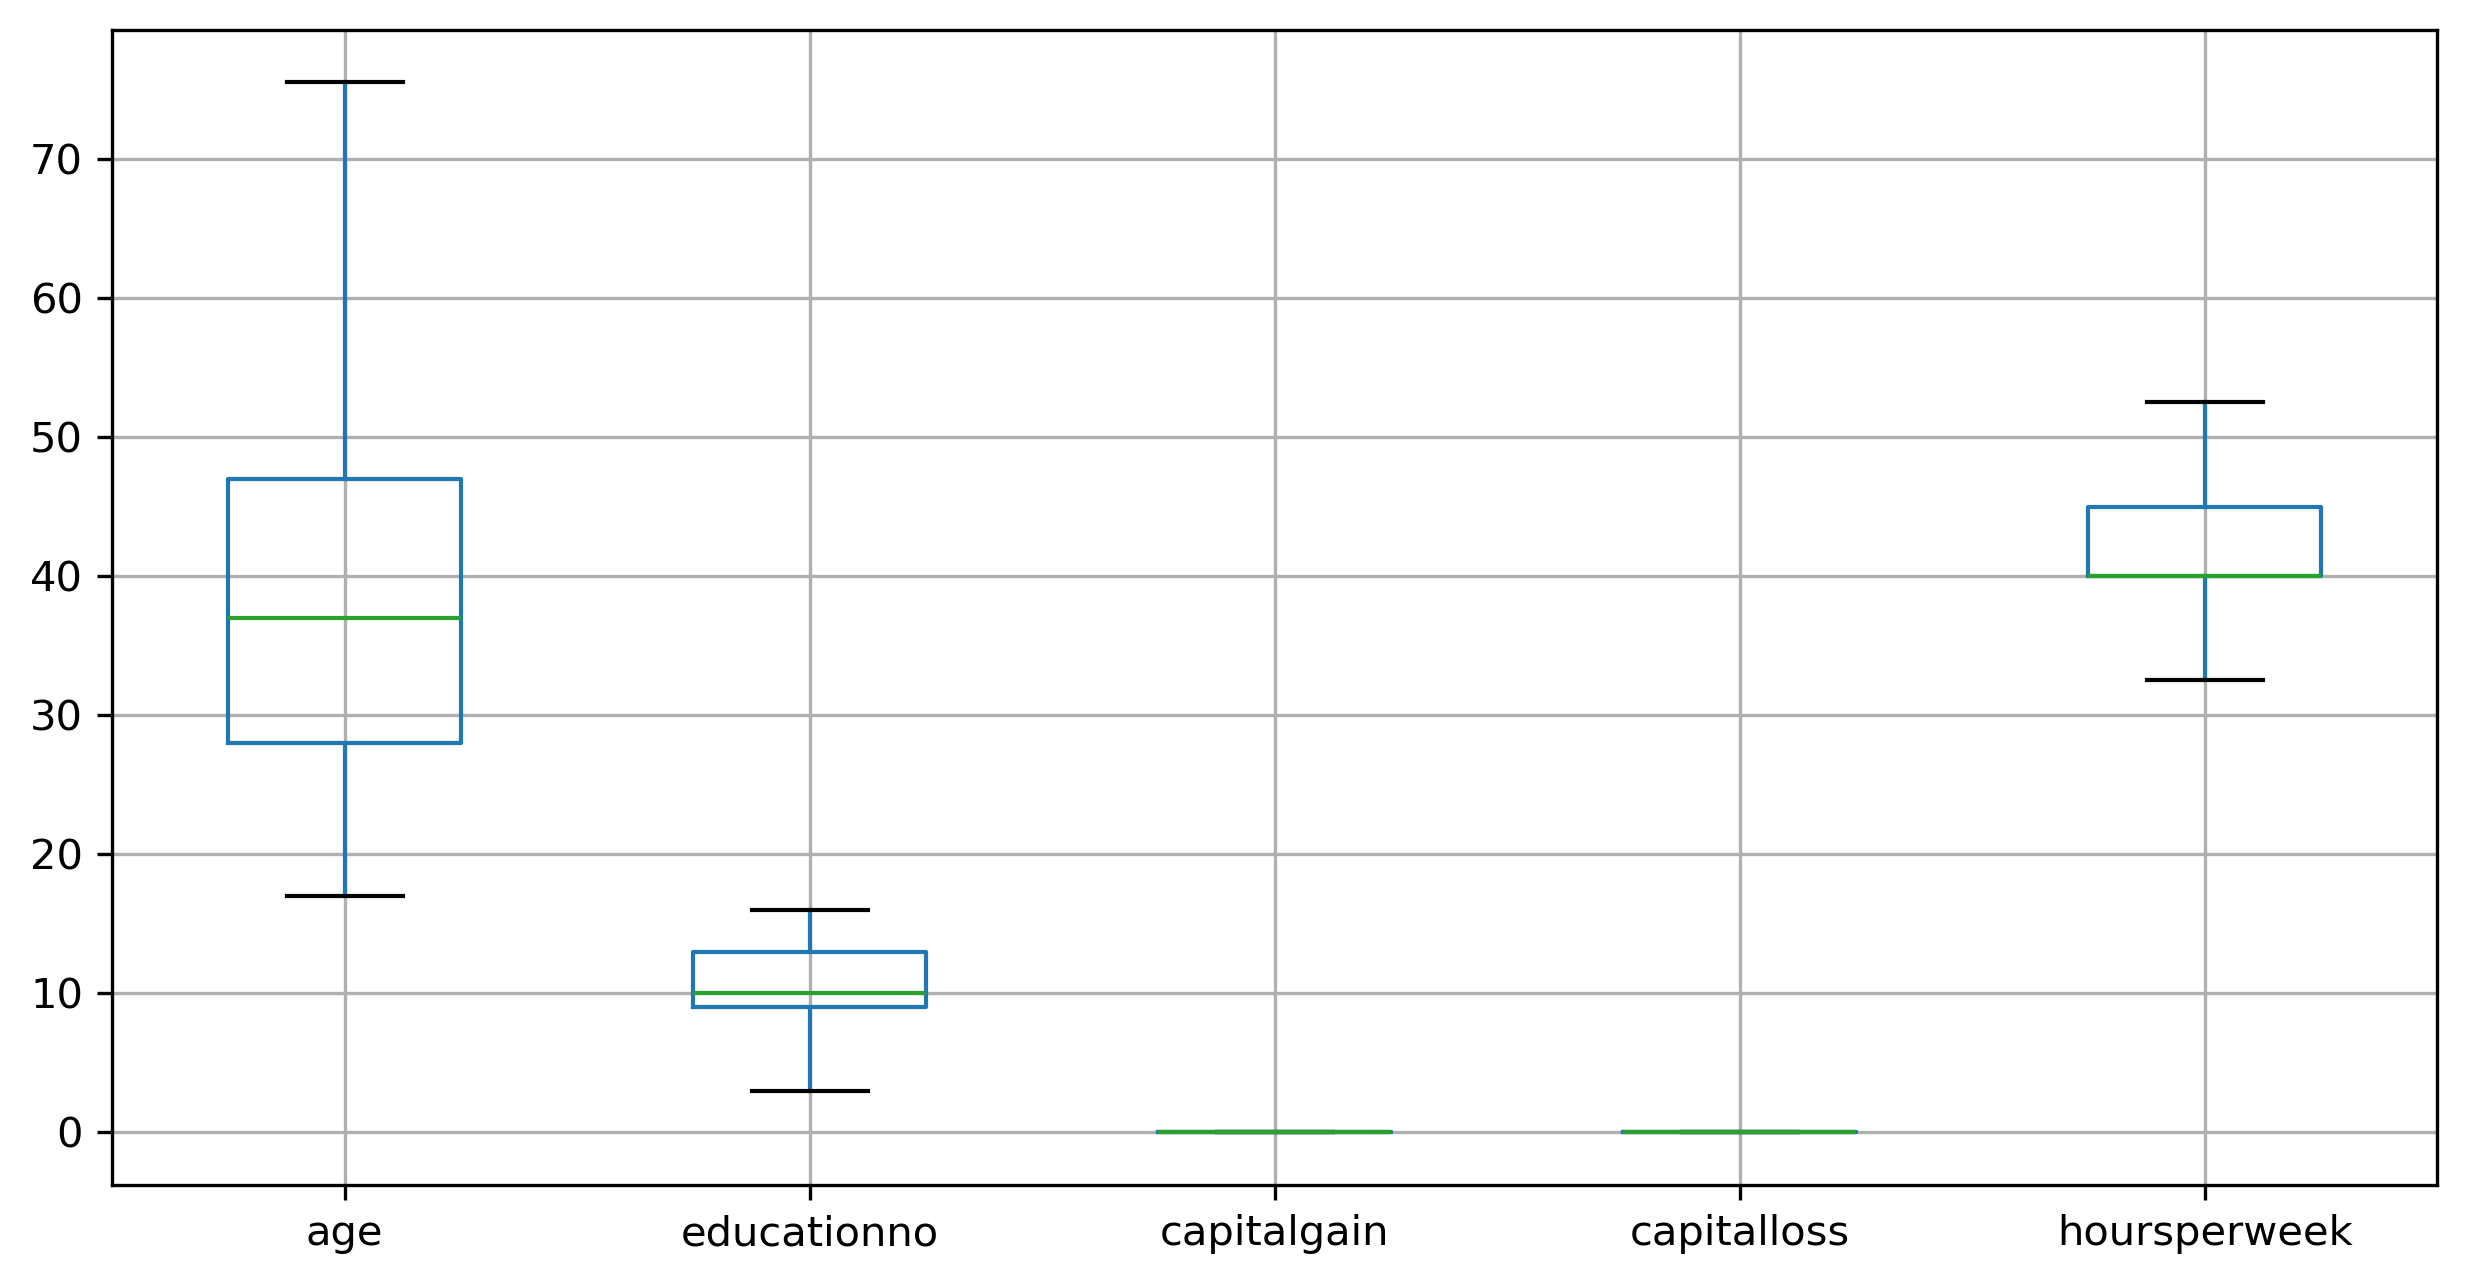

In [13]:
train_data.boxplot()

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [15]:
cat_cols = train_data.select_dtypes(object).columns
cat_cols
train_data[cat_cols]

workclass    education        maritalstatus  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
30156            Private   Assoc-acdm   Married-civ-spouse   
30157            Private      HS-grad   Married-civ-spouse   
30158            Private      HS-grad              Widowed   
30159            Private      HS-grad        Never-married   
30160       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex          native  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
30156        Tech-support            Wife   White   Female   United-States   
30157   Machine-op-inspct         Husband   White     Male   United-States   
30158        Adm-clerical       Unmarried   White   Female   United-States   
30159        Adm-clerical       Own-child   White     Male   United-States   
30160     Exec-managerial            Wife   White   Female   United-States   

       Salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
30156   <=50K  
30157    >50K  
30158   <=50K  
30159   <=50K  
30160    >50K  

[30161 rows x 9 columns]

In [16]:
train_data[cat_cols] = oe.fit_transform(train_data[cat_cols])
train_data

age  workclass  education  educationno  maritalstatus  occupation  \
0      39.0        5.0        9.0         13.0            4.0         0.0   
1      50.0        4.0        9.0         13.0            2.0         3.0   
2      38.0        2.0       11.0          9.0            0.0         5.0   
3      53.0        2.0        1.0          7.0            2.0         5.0   
4      28.0        2.0        9.0         13.0            2.0         9.0   
...     ...        ...        ...          ...            ...         ...   
30156  27.0        2.0        7.0         12.0            2.0        12.0   
30157  40.0        2.0       11.0          9.0            2.0         6.0   
30158  58.0        2.0       11.0          9.0            6.0         0.0   
30159  22.0        2.0       11.0          9.0            4.0         0.0   
30160  52.0        3.0       11.0          9.0            2.0         3.0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0               1.0   4.0  1.0          0.0          0.0          40.0   
1               0.0   4.0  1.0          0.0          0.0          32.5   
2               1.0   4.0  1.0          0.0          0.0          40.0   
3               0.0   2.0  1.0          0.0          0.0          40.0   
4               5.0   2.0  0.0          0.0          0.0          40.0   
...             ...   ...  ...          ...          ...           ...   
30156           5.0   4.0  0.0          0.0          0.0          38.0   
30157           0.0   4.0  1.0          0.0          0.0          40.0   
30158           4.0   4.0  0.0          0.0          0.0          40.0   
30159           3.0   4.0  1.0          0.0          0.0          32.5   
30160           5.0   4.0  0.0          0.0          0.0          40.0   

       native  Salary  
0        37.0     0.0  
1        37.0     0.0  
2        37.0     0.0  
3        37.0     0.0  
4         4.0     0.0  
...       ...     ...  
30156    37.0     0.0  
30157    37.0     1.0  
30158    37.0     0.0  
30159    37.0     0.0  
30160    37.0     1.0  

[30161 rows x 14 columns]

In [17]:
test_data = pd.read_csv("SalaryData_Test.csv")

test_data = test_data.drop(columns= 'Salary')
test_data

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  
0                0            0            40   United-States  
1                0            0            50   United-States  
2                0            0            40   United-States  
3             7688            0            40   United-States  
4                0            0            30   United-States  
...            ...          ...           ...             ...  
15055            0            0            40   United-States  
15056            0            0            36   United-States  
15057            0            0            50   United-States  
15058         5455            0            40   United-States  
15059            0            0            60   United-States  

[15060 rows x 13 columns]

In [18]:
cat_cols = test_data.select_dtypes(object).columns
cat_cols
test_data[cat_cols]

workclass      education        maritalstatus          occupation  \
0            Private           11th        Never-married   Machine-op-inspct   
1            Private        HS-grad   Married-civ-spouse     Farming-fishing   
2          Local-gov     Assoc-acdm   Married-civ-spouse     Protective-serv   
3            Private   Some-college   Married-civ-spouse   Machine-op-inspct   
4            Private           10th        Never-married       Other-service   
...              ...            ...                  ...                 ...   
15055        Private      Bachelors        Never-married      Prof-specialty   
15056        Private      Bachelors             Divorced      Prof-specialty   
15057        Private      Bachelors   Married-civ-spouse      Prof-specialty   
15058        Private      Bachelors             Divorced        Adm-clerical   
15059   Self-emp-inc      Bachelors   Married-civ-spouse     Exec-managerial   

         relationship                 race      sex          native  
0           Own-child                Black     Male   United-States  
1             Husband                White     Male   United-States  
2             Husband                White     Male   United-States  
3             Husband                Black     Male   United-States  
4       Not-in-family                White     Male   United-States  
...               ...                  ...      ...             ...  
15055       Own-child                White     Male   United-States  
15056   Not-in-family                White   Female   United-States  
15057         Husband                White     Male   United-States  
15058       Own-child   Asian-Pac-Islander     Male   United-States  
15059         Husband                White     Male   United-States  

[15060 rows x 8 columns]

In [19]:
test_data[cat_cols] = oe.fit_transform(test_data[cat_cols])
test_data

age  workclass  education  educationno  maritalstatus  occupation  \
0       25        2.0        1.0            7            4.0         6.0   
1       38        2.0       11.0            9            2.0         4.0   
2       28        1.0        7.0           12            2.0        10.0   
3       44        2.0       15.0           10            2.0         6.0   
4       34        2.0        0.0            6            4.0         7.0   
...    ...        ...        ...          ...            ...         ...   
15055   33        2.0        9.0           13            4.0         9.0   
15056   39        2.0        9.0           13            0.0         9.0   
15057   38        2.0        9.0           13            2.0         9.0   
15058   44        2.0        9.0           13            0.0         0.0   
15059   35        3.0        9.0           13            2.0         3.0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0               3.0   2.0  1.0            0            0            40    37.0  
1               0.0   4.0  1.0            0            0            50    37.0  
2               0.0   4.0  1.0            0            0            40    37.0  
3               0.0   2.0  1.0         7688            0            40    37.0  
4               1.0   4.0  1.0            0            0            30    37.0  
...             ...   ...  ...          ...          ...           ...     ...  
15055           3.0   4.0  1.0            0            0            40    37.0  
15056           1.0   4.0  0.0            0            0            36    37.0  
15057           0.0   4.0  1.0            0            0            50    37.0  
15058           3.0   1.0  1.0         5455            0            40    37.0  
15059           0.0   4.0  1.0            0            0            60    37.0  

[15060 rows x 13 columns]

In [20]:
X_train = train_data.drop(columns=['Salary'])
y_train = train_data['Salary']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC()

In [26]:
svc.fit(X_train,y_train)

SVC()

In [27]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.8033405172413793, 0.8000994530084535)